# 📥 Imports

## 📲 Instalar dependências

In [2]:
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/red_pill_analises/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import seaborn as sns
import os
from google.colab import drive

caminho_dados_brutos = 'data_base/dados_brutos/'
caminho_dados_anonimizados = 'data_base/dados_anonimizados/'
caminho_dados_limpos = 'data_base/dados_limpos/'

In [4]:
%pip install isodate

## 📊 Banco de Dados

1) Imports dos dados brutos


In [ ]:
df_canais_brutos = pd.read_csv( folder_path + caminho_dados_brutos + 'canais_brutos.csv')

In [ ]:
df_videos_brutos = pd.read_csv( folder_path + caminho_dados_brutos + 'videos_brutos.csv')

In [ ]:
df_comentarios_brutos = pd.read_csv( folder_path + caminho_dados_brutos + 'comentarios_brutos.csv')

2) Imports dos dados anonimizados

In [ ]:
df_canais_anonimizados = pd.read_csv( folder_path + caminho_dados_anonimizados + 'canais_anonimizados.csv')

In [ ]:
df_videos_anonimizados = pd.read_csv( folder_path + caminho_dados_anonimizados + 'videos_anonimizados.csv')

In [ ]:
df_comentarios_anonimizados = pd.read_csv( folder_path + caminho_dados_anonimizados + 'comentarios_anonimizados.csv')

3) Imports dos dados limpos

In [5]:
df_canais_limpos = pd.read_csv( folder_path + caminho_dados_limpos + 'canais_limpos.csv')

In [6]:
df_videos_limpos = pd.read_csv( folder_path + caminho_dados_limpos + 'videos_limpos.csv')

In [7]:
df_comentarios_limpos = pd.read_csv( folder_path + caminho_dados_limpos + 'comentarios_limpos.csv')

# 🔎 Análises

## 🫱🏾‍🫲🏼 Estatísitcas comparativas

In [ ]:
# Extrai apenas o padrão de data-hora da coluna
df_videos_limpos['published_at_limpa'] = df_videos_limpos['published_at'].str.extract(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\+\d{2}:\d{2})')

# Agora, faça a conversão na nova coluna limpa
df_videos_limpos['published_at'] = pd.to_datetime(df_videos_limpos['published_at_limpa'], errors='coerce')

# Verifique o resultado
print(df_videos_limpos[['published_at_limpa', 'published_at']].head())

          published_at_limpa              published_at
0  2024-08-24 13:46:17+00:00 2024-08-24 13:46:17+00:00
1  2024-10-11 22:00:06+00:00 2024-10-11 22:00:06+00:00
2  2025-04-29 12:01:43+00:00 2025-04-29 12:01:43+00:00
3  2024-01-29 14:30:03+00:00 2024-01-29 14:30:03+00:00
4  2024-04-26 18:40:00+00:00 2024-04-26 18:40:00+00:00


In [ ]:
df_videos_limpos['published_at'] = pd.to_datetime(df_videos_limpos['published_at'], errors='coerce')
df_videos_limpos['published_at'].max()

Timestamp('2025-06-29 23:39:54+0000', tz='UTC')

In [ ]:
# Conta quantos valores nulos (NaT) existem na coluna após a conversão
datas_perdidas = df_videos_limpos['published_at'].isnull().sum()

print(f"Número de datas que não puderam ser convertidas (e viraram NaT): {datas_perdidas}")

Número de datas que não puderam ser convertidas (e viraram NaT): 0


Calcular as estatísticas

In [ ]:
# Brutos
canais_BRUTOS = df_canais_brutos.shape[0]
videos_BRUTOS = df_videos_brutos.shape[0]
comentarios_BRUTOS = df_comentarios_brutos.shape[0]
comentadores_BRUTOS = df_comentarios_brutos['author_channel_id'].unique().shape[0]
df_videos_brutos['published_at'] = pd.to_datetime(df_videos_brutos['published_at'], errors='coerce')
periodo_total_BRUTOS = (df_videos_brutos['published_at'].max() - df_videos_brutos['published_at'].min()).days / 30.44

In [ ]:
# Anonimizados
canais = df_canais_anonimizados.shape[0]
videos = df_videos_anonimizados.shape[0]
comentarios = df_comentarios_anonimizados.shape[0]
comentadores = df_comentarios_anonimizados['id_autor_anonimizado'].unique().shape[0]
df_videos_anonimizados['published_at'] = pd.to_datetime(df_videos_anonimizados['published_at'], errors='coerce')
periodo_total = (df_videos_anonimizados['published_at'].max() - df_videos_anonimizados['published_at'].min()).days / 30.44

In [ ]:
# Limpos
canais_limpos = df_canais_limpos.shape[0]
videos_limpos = df_videos_limpos.shape[0]
comentarios_limpos = df_comentarios_limpos.shape[0]
comentadores_limpos = df_comentarios_limpos['id_autor_anonimizado'].unique().shape[0]
df_videos_limpos['published_at'] = pd.to_datetime(df_videos_limpos['published_at'], errors='coerce')
periodo_total_limpos = (df_videos_limpos['published_at'].max() - df_videos_limpos['published_at'].min()).days / 30.44

Criar a tabela (DataFrame) com os resultados

In [ ]:
tabela_estatisticas = pd.DataFrame({
    '': ['Canais', 'Vídeos', 'Comentários','Comentadores Únicos','Período (em meses)'],
    'Qnt Bruta': [
        f'{canais_BRUTOS:,}'.replace(',', '.'),
        f'{videos_BRUTOS:,}'.replace(',', '.'),
        f'{comentarios_BRUTOS:,}'.replace(',', '.'),
        f'{comentadores_BRUTOS:,}'.replace(',', '.'),
        f'{periodo_total_BRUTOS:.0f}'.replace('.', ',')
    ],
    'Qnt Anonimizados': [
        f'{canais:,}'.replace(',', '.'),
        f'{videos:,}'.replace(',', '.'),
        f'{comentarios:,}'.replace(',', '.'),
        f'{comentadores:,}'.replace(',', '.'),
        f'{periodo_total:.0f}'.replace('.', ',')
    ],
    'Qnt Limpos': [
        f'{canais_limpos:,}'.replace(',', '.'),
        f'{videos_limpos:,}'.replace(',', '.'),
        f'{comentarios_limpos:,}'.replace(',', '.'),
        f'{comentadores_limpos:,}'.replace(',', '.'),
        f'{periodo_total_limpos:.0f}'.replace('.', ',')
    ]
})

Plotar a tabela

In [ ]:
tabela_estatisticas

,,Qnt Bruta,Qnt Anonimizados,Qnt Limpos
0,Canais,28,28,28
1,Vídeos,18.034,18.034,18.034
2,Comentários,3.037.221,3.037.221,2.238.836
3,Comentadores Únicos,613.146,613.146,486.010
4,Período (em meses),18,18,18


In [ ]:
# Conte quantas vezes um ID de vídeo aparece mais de uma vez
duplicatas_video = df_videos_limpos['id_video_anonimizado'].duplicated().sum()
duplicatas_canal = df_canais_limpos['id_canal_anonimizado'].duplicated().sum()
duplicatas_comentario = df_comentarios_limpos['id_comentario_anonimizado'].duplicated().sum()


print(f"Existem {duplicatas_canal}, {duplicatas_video}, {duplicatas_comentario} IDs duplicados.")

Existem 0, 0, 0 IDs duplicados.


In [ ]:
df_videos_limpos.columns

Index(['Unnamed: 0', 'published_at', 'category_id', 'tags', 'view_count',
       'like_count', 'comment_count', 'duration', 'definition', 'caption',
       'licensed_content', 'privacy_status', 'license', 'embeddable',
       'public_stats_viewable', 'is_made_for_kids', 'thumbnail_url',
       'default_audio_language', 'default_language', 'actual_start_time',
       'scheduled_start_time', 'actual_end_time', 'scheduled_end_time',
       'concurrent_viewers', 'active_live_chat_id', 'recording_date',
       'topicCategories', 'processing_status', 'parts_total',
       'parts_processed', 'time_left_ms', 'processing_failure_reason',
       'transcription', 'id_canal_anonimizado', 'id_video_anonimizado', 'text',
       'emojis', 'hashtags', 'published_at_limpa'],
      dtype='object')

## 🧼 Série temporal e Tabelona

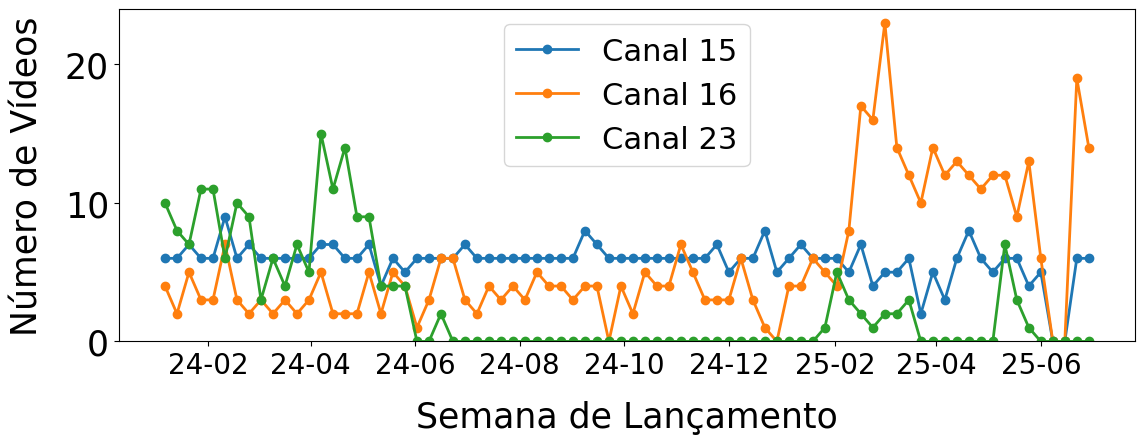

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import matplotlib.dates as mdates

# Padronização de fonte para publicação
plt.rcParams.update({
    'font.family': 'DejaVu Sans',    # Fonte limpa e legível
    'font.size': 25,                 # Tamanho base do texto
    'axes.titlesize': 25,            # Título do gráfico
    'axes.labelsize': 25,            # Rótulos dos eixos
    'xtick.labelsize': 20,           # Ticks do eixo X
    'ytick.labelsize': 25,           # Ticks do eixo Y
    'legend.fontsize': 22,           # Legenda
    'lines.linewidth': 2,            # Linhas visíveis mesmo em impressão
    'lines.markersize': 6            # Marcadores equilibrados
})

# Dicionário auxiliar para nomear os canais
nomes_canais = {
    'canal_15':'Canal 15',          # Canal Constante -> 15
    'canal_16': 'Canal 16',         # Canal com muitos picos -> 16
    'canal_23': 'Canal 23'          # Canal com pico em março -> 23
}

# 1. Selecionar os canais desejados
chosen_channels = df_canais_limpos[
    df_canais_limpos['id_canal_anonimizado'].isin(nomes_canais.keys())
][['id_canal_anonimizado']].copy()

# Adicionar coluna auxiliar com nomes legíveis
chosen_channels['nome_auxiliar'] = chosen_channels['id_canal_anonimizado'].map(nomes_canais)

# 2. Juntar com vídeos para trazer o nome do canal
df_merged = pd.merge(df_videos_limpos, chosen_channels, on='id_canal_anonimizado', how='left')
df_merged['published_at'] = pd.to_datetime(df_merged['published_at'])

# Filtrar apenas vídeos a partir de 2024
# df_merged = df_merged[df_merged['published_at'] >= '2024-01-01']

# 3. Total de vídeos por semana (todos os canais)
videos_por_semana_total = df_merged.groupby(
    pd.Grouper(key='published_at', freq='W')
).size().reset_index(name='total_video_count')

# Seu código original para criar o dataframe agrupado
videos_por_semana_canal = df_merged.dropna(subset=['nome_auxiliar'])
videos_por_semana_canal = videos_por_semana_canal.groupby(
    [pd.Grouper(key='published_at', freq='W'), 'nome_auxiliar']
).size().reset_index(name='video_count')

# 1. Definir o intervalo completo de datas (todas as semanas de 2024 e 2025)
# Usando o início e o fim dos seus dados já agrupados
date_range = pd.date_range(
    start=videos_por_semana_canal['published_at'].min(),
    end=videos_por_semana_canal['published_at'].max(),
    freq='W' # A mesma frequência do grouper
)

# 2. Pegar a lista de todos os canais únicos
all_channels = videos_por_semana_canal['nome_auxiliar'].unique()

# 3. Criar um novo índice com TODAS as combinações de semanas e canais
new_index = pd.MultiIndex.from_product(
    [date_range, all_channels],
    names=['published_at', 'nome_auxiliar']
)

# 4. Reindexar o DataFrame original e preencher os dados faltantes com 0
# Primeiro, definimos o índice para o reindex funcionar
videos_por_semana_canal_completo = videos_por_semana_canal.set_index(['published_at', 'nome_auxiliar'])

# Agora, reindexamos com o índice completo e preenchemos os 'NaN' com 0
videos_por_semana_canal_completo = videos_por_semana_canal_completo.reindex(new_index).fillna(0).reset_index()

# Agora você pode usar 'videos_por_semana_canal_completo' para plotar o gráfico.
# O gráfico não terá mais aquela linha longa e estranha.


# ---------------------------
# Gráficos com Matplotlib
# ---------------------------

# Caminhos
caminho_da_pasta_drive = folder_path + 'principal/imagens_analises/'
os.makedirs(caminho_da_pasta_drive, exist_ok=True)

caminho_completo_1 = os.path.join(caminho_da_pasta_drive, 'grafico_temporal_videos_por_canal_total_matplotlib.png')
caminho_completo_2 = os.path.join(caminho_da_pasta_drive, 'grafico_temporal_videos_por_canal_perfis_selecionados_matplotlib.png')
caminho_completo_3 = os.path.join(caminho_da_pasta_drive, 'grafico_temporal_videos_por_canal_comparativo_matplotlib.png')


plt.figure(figsize=(12, 5))
for canal in videos_por_semana_canal_completo['nome_auxiliar'].unique():
    # Filtre pelo novo dataframe
    dados_canal = videos_por_semana_canal_completo[videos_por_semana_canal_completo['nome_auxiliar'] == canal]
    plt.plot(dados_canal['published_at'], dados_canal['video_count'], marker='o', label=canal)


# plt.yscale('log')  # Escala logarítmica no eixo Y
plt.ylim(0, 24)
plt.xlabel('Semana de Lançamento', labelpad=15)
plt.ylabel('Número de Vídeos', labelpad=15)
plt.legend()
plt.grid(False)

# Formatação do eixo X
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))

plt.tight_layout()
plt.savefig(caminho_completo_2)
plt.show()

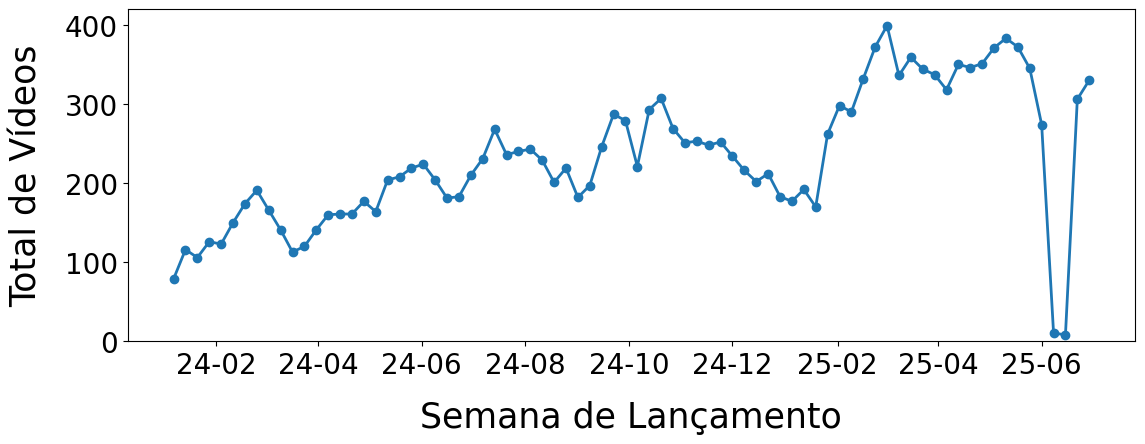

In [ ]:
# Padronização de fonte para publicação
plt.rcParams.update({
    'font.family': 'DejaVu Sans',    # Fonte limpa e legível
    'font.size': 25,                 # Tamanho base do texto
    'axes.titlesize': 25,            # Título do gráfico
    'axes.labelsize': 25,            # Rótulos dos eixos
    'xtick.labelsize': 20,           # Ticks do eixo X
    'ytick.labelsize': 20,           # Ticks do eixo Y
    'legend.fontsize': 15,           # Legenda
    'lines.linewidth': 2,            # Linhas visíveis mesmo em impressão
    'lines.markersize': 6            # Marcadores equilibrados
})

# GRÁFICO 1: Total de vídeos por semana (todos os canais)
plt.figure(figsize=(12, 5))
plt.plot(videos_por_semana_total['published_at'], videos_por_semana_total['total_video_count'], marker='o')

# plt.yscale('log')
plt.ylim(0, 420)
plt.xlabel('Semana de Lançamento', labelpad=15)
plt.ylabel('Total de Vídeos', labelpad=15)
plt.grid(False)

# Formatação do eixo X
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))

plt.tight_layout()
plt.savefig(caminho_completo_1)
plt.show()

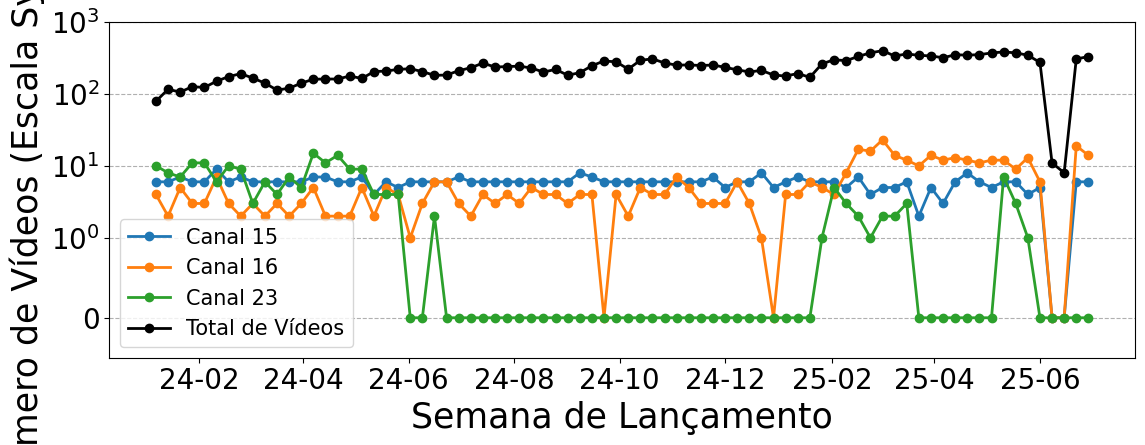

In [ ]:
# GRÁFICO 3 CORRIGIDO: Usando a escala 'symlog'

plt.figure(figsize=(12, 5))
ax = plt.gca()

# Linhas dos canais selecionados (sem precisar alterar os dados)
for canal in videos_por_semana_canal_completo['nome_auxiliar'].unique():
    dados_canal = videos_por_semana_canal_completo[videos_por_semana_canal_completo['nome_auxiliar'] == canal]
    plt.plot(dados_canal['published_at'],
             dados_canal['video_count'], # Usamos os dados originais com zeros
             marker='o',
             label=canal)

# Linha do total de vídeos (todos os canais)
plt.plot(videos_por_semana_total['published_at'],
         videos_por_semana_total['total_video_count'],
         marker='o', color='black', label='Total de Vídeos')

# --- MUDANÇA PRINCIPAL AQUI ---
# Usamos 'symlog'. O 'linthresh=1' define que a escala será linear entre -1 e 1.
# Como o menor número de vídeos é 1, isso funciona perfeitamente.
plt.yscale('symlog', linthresh=1)
plt.ylim(bottom=-0.5, top=1e3) # Podemos incluir o 0 no limite inferior

# Formatação do eixo X
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))

# Rótulos e legenda
plt.xlabel('Semana de Lançamento')
plt.ylabel('Número de Vídeos (Escala Symlog)')
plt.legend()
plt.grid(True, which='major', axis='y', linestyle='--') # Grid pode ser útil aqui
plt.grid(False, which='major', axis='x')
plt.tight_layout()
plt.savefig(caminho_completo_3.replace('.png', '_symlog.png')) # Salva com outro nome
plt.show()

In [ ]:
df_videos_limpos.columns

Index(['Unnamed: 0', 'published_at', 'category_id', 'tags', 'view_count',
       'like_count', 'comment_count', 'duration', 'definition', 'caption',
       'licensed_content', 'privacy_status', 'license', 'embeddable',
       'public_stats_viewable', 'is_made_for_kids', 'thumbnail_url',
       'default_audio_language', 'default_language', 'actual_start_time',
       'scheduled_start_time', 'actual_end_time', 'scheduled_end_time',
       'concurrent_viewers', 'active_live_chat_id', 'recording_date',
       'topicCategories', 'processing_status', 'parts_total',
       'parts_processed', 'time_left_ms', 'processing_failure_reason',
       'transcription', 'id_canal_anonimizado', 'id_video_anonimizado', 'text',
       'emojis', 'hashtags', 'published_at_limpa'],
      dtype='object')

In [ ]:
print(f"Total de comentários limpos: {df_comentarios_limpos.shape[0]}")

Total de comentários limpos: 2238836


In [ ]:
print("--- VERIFICAÇÃO INICIAL DOS DADOS ---")
print(f"Shape de df_videos_limpos: {df_videos_limpos.shape}")
print(f"Shape de df_comentarios_limpos: {df_comentarios_limpos.shape}") # <- ESTE É O NÚMERO CRÍTICO
print(f"Shape de df_canais_limpos: {df_canais_limpos.shape}")
print("--------------------------------------\n")

--- VERIFICAÇÃO INICIAL DOS DADOS ---
Shape de df_videos_limpos: (18034, 39)
Shape de df_comentarios_limpos: (2238836, 21)
Shape de df_canais_limpos: (28, 14)
--------------------------------------



In [ ]:
df_videos_limpos['published_at']

,published_at
0,2024-08-24 13:46:17+00:00
1,2024-10-11 22:00:06+00:00
2,2025-04-29 12:01:43+00:00
3,2024-01-29 14:30:03+00:00
4,2024-04-26 18:40:00+00:00
...,...
18029,2024-06-07 21:00:03+00:00
18030,2024-08-02 21:00:13+00:00
18031,2024-05-31 21:00:23+00:00
18032,2024-07-27 15:00:41+00:00


## Gerar Tabelona

In [ ]:
import pandas as pd
import numpy as np
import isodate

# ==============================================================================
# PASSO 0
# ==============================================================================
# df_videos_limpos: Tabela com metadados de cada vídeo

# df_comentarios_limpos: Tabela com cada comentário individual

# df_canais_limpos: Tabela com dados dos canais


# ==============================================================================
# PASSO 1: PREPARAÇÃO E LIMPEZA DOS DADOS
# Convertemos tipos de dados e criamos colunas auxiliares.
# ==============================================================================
print("Iniciando Passo 1: Preparação dos Dados...")

# --- Garantir que IDs de canal são do tipo string para merges corretos ---
df_videos_limpos['id_canal_anonimizado'] = df_videos_limpos['id_canal_anonimizado'].astype(str)
df_canais_limpos['id_canal_anonimizado'] = df_canais_limpos['id_canal_anonimizado'].astype(str)

# --- Converter 'published_at' para datetime para cálculos de tempo ---
df_videos_limpos['published_at'] = pd.to_datetime(df_videos_limpos['published_at'], errors='coerce')

# --- Função para converter duração ISO 8601 para segundos ---
def converter_duracao_em_segundos(dur):
    if pd.isna(dur):
        return np.nan
    try:
        return isodate.parse_duration(dur).total_seconds()
    except (isodate.ISO8601Error, TypeError):
        return np.nan

df_videos_limpos['duration_sec'] = df_videos_limpos['duration'].apply(converter_duracao_em_segundos)

# Garantir datetime
df_videos_limpos['published_at'] = pd.to_datetime(df_videos_limpos['published_at'], errors='coerce')
df_videos_limpos['ano_mes'] = df_videos_limpos['published_at'].dt.to_period('M')

# Calcular número de meses com pelo menos 1 vídeo por canal — sem depender de merges
meses_atividade = df_videos_limpos.groupby('id_canal_anonimizado')['ano_mes'].nunique().reset_index(name='num_meses_atividade')

print("Passo 1 concluído com sucesso.\n")


# ==============================================================================
# PASSO 2: CÁLCULO DA CONTAGEM REAL DE COMENTÁRIOS (APÓS FILTRO)
# Aqui, usamos df_comentarios_limpos para obter a contagem real e a juntamos
# à tabela de vídeos.
# ==============================================================================
print("Iniciando Passo 2: Calculando Contagem Real de Comentários (após filtro)...")
print(f"Total de comentários após o filtro (dentro da função): {df_comentarios_limpos.shape[0]}")


# --- Agrupar por vídeo e contar o número de comentários FILTRADOS ---
comentarios_por_video = df_comentarios_limpos.groupby('id_video_anonimizado').size().reset_index(name='contagem_real_comentarios')






Iniciando Passo 1: Preparação dos Dados...
Passo 1 concluído com sucesso.

Iniciando Passo 2: Calculando Contagem Real de Comentários (após filtro)...
Total de comentários após o filtro (dentro da função): 2238836


/tmp/ipython-input-3120959057.py:41: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_videos_limpos['ano_mes'] = df_videos_limpos['published_at'].dt.to_period('M')


In [ ]:
comentarios_por_video.sum()

,0
id_video_anonimizado,video_1video_10video_100video_1000video_10000v...
contagem_real_comentarios,2238836


In [ ]:
# --- Juntar a contagem real à nossa tabela de vídeos ---
# Usamos um 'left merge' para manter todos os vídeos, mesmo aqueles que não têm comentários.
df_videos_com_contagem_real = pd.merge(
    df_videos_limpos,
    comentarios_por_video,
    on='id_video_anonimizado',
    how='left'
)

# --- Preencher com 0 os vídeos que não tinham comentários no df_comentarios_limpos_filtrado ---
df_videos_com_contagem_real['contagem_real_comentarios'] = df_videos_com_contagem_real['contagem_real_comentarios'].fillna(0).astype(int)

# Agora, temos um DataFrame `df_videos_com_contagem_real` que é a base para nossas agregações.
# Ele contém a contagem de comentários correta e ignora a coluna original 'comment_count'.
print("Passo 2 concluído. A coluna 'contagem_real_comentarios' foi criada e adicionada com base nos comentários filtrados.\n")

Passo 2 concluído. A coluna 'contagem_real_comentarios' foi criada e adicionada com base nos comentários filtrados.



In [ ]:
df_videos_com_contagem_real['contagem_real_comentarios'].sum()

np.int64(2238836)

In [ ]:
# ==============================================================================
# PASSO 3: AGREGAÇÃO DAS MÉTRICAS POR CANAL
# Agrupamos por canal para calcular totais, médias e desvios padrão.
# ==============================================================================
print("Iniciando Passo 3: Agregando Métricas por Canal...")

# --- Agregação principal ---
# Note que estamos usando 'contagem_real_comentarios' e as outras métricas vêm de df_videos, como solicitado.
agregado_principal = df_videos_com_contagem_real.groupby('id_canal_anonimizado').agg(
    num_videos_coletados=('id_video_anonimizado', 'count'),
    duracao_media=('duration_sec', 'mean'),
    duracao_std=('duration_sec', 'std'),
    # Usando a nova contagem de comentários
    total_comentarios=('contagem_real_comentarios', 'sum'),
    comentarios_media=('contagem_real_comentarios', 'mean'),
    comentarios_std=('contagem_real_comentarios', 'std'),
    # Métricas restantes, todas baseadas em df_videos_limpos
    total_visualizacoes=('view_count', 'sum'),
    visualizacoes_media=('view_count', 'mean'),
    visualizacoes_std=('view_count', 'std'),
    total_likes=('like_count', 'sum'),
    likes_media=('like_count', 'mean'),
    likes_std=('like_count', 'std')
).reset_index()

# --- Cálculo de meses de atividade ---
# meses_atividade = df_videos_com_contagem_real.groupby('id_canal_anonimizado')['ano_mes'].nunique().reset_index(name='num_meses_atividade')

# --- Cálculo da frequência de postagem (vídeos por mês) ---
videos_mes = df_videos_limpos.groupby(['id_canal_anonimizado', 'ano_mes']).size().reset_index(name='videos_no_mes')
videos_stats = videos_mes.groupby('id_canal_anonimizado').agg(
    media_videos_por_mes=('videos_no_mes', 'mean'),
    std_videos_por_mes=('videos_no_mes', 'std')
).reset_index()

# --- Extração do número de inscritos (única métrica que vem de df_canais_limpos) ---
inscritos = df_canais_limpos[['id_canal_anonimizado', 'subscriber_count']]

print("Passo 3 concluído com sucesso.\n")


# ==============================================================================
# PASSO 4: JUNÇÃO FINAL, FORMATAÇÃO E ORGANIZAÇÃO
# Unimos todas as tabelas agregadas em uma "tabelona" final.
# ==============================================================================
print("Iniciando Passo 4: Montando a Tabela Final...")

# --- Unir todas as partes em uma única tabela ---
tabelona = agregado_principal \
    .merge(meses_atividade, on='id_canal_anonimizado', how='left') \
    .merge(videos_stats, on='id_canal_anonimizado', how='left') \
    .merge(inscritos, on='id_canal_anonimizado', how='left')

# --- Renomear colunas para um formato mais legível ---
tabelona = tabelona.rename(columns={
    'num_videos_coletados': 'Vídeos coletados',
    'num_meses_atividade': 'Meses de atividade',
    'media_videos_por_mes': 'Média vídeos/mês',
    'std_videos_por_mes': 'DP vídeos/mês',
    'duracao_media': 'Duração média (s)',
    'duracao_std': 'DP duração (s)',
    'total_comentarios': 'Total comentários',
    'comentarios_media': 'Média comentários',
    'comentarios_std': 'DP comentários',
    'total_visualizacoes': 'Total visualizações',
    'visualizacoes_media': 'Média visualizações',
    'visualizacoes_std': 'DP visualizações',
    'total_likes': 'Total curtidas',
    'likes_media': 'Média likes',
    'likes_std': 'DP likes',
    'subscriber_count': 'Inscritos'
})

# --- Combinar colunas de média e desvio padrão em um formato "Média (DP)" ---
metricas_para_formatar = {
    'Média vídeos/mês': 'DP vídeos/mês',
    'Duração média (s)': 'DP duração (s)',
    'Média comentários': 'DP comentários',
    'Média visualizações': 'DP visualizações',
    'Média likes': 'DP likes'
}

for media_col, std_col in metricas_para_formatar.items():
    nova_col_nome = f"{media_col} (dp)"
    # .fillna(0) no desvio padrão para canais com apenas uma entrada (onde DP é NaN)
    tabelona[nova_col_nome] = (
        tabelona[media_col].round(1).astype(str) +
        ' (' +
        tabelona[std_col].fillna(0).round(1).astype(str) +
        ')'
    )

# --- Selecionar e reordenar as colunas para a tabela final ---
colunas_finais = [
    'id_canal_anonimizado',
    'Inscritos',
    'Vídeos coletados',
    'Meses de atividade',
    'Média vídeos/mês (dp)',
    'Duração média (s) (dp)',
    'Total visualizações',
    'Média visualizações (dp)',
    'Total curtidas',
    'Média likes (dp)',
    'Total comentários',
    'Média comentários (dp)'
]

tabelona_final = tabelona[colunas_finais].sort_values(by='Inscritos', ascending=False)

# --- Preencher valores NaN que possam ter surgido (ex: DP em canais com 1 vídeo)
tabelona_final = tabelona_final.fillna(0)

print("Passo 4 concluído. A 'tabelona' está pronta!\n")

# ==============================================================================
# PASSO 5: VISUALIZAÇÃO E EXPORTAÇÃO
# ==============================================================================
print("Resultado Final:")
display(tabelona_final)

# --- Para salvar em um arquivo CSV ---
print("\nSalvando a tabela em um arquivo CSV...")
caminho_salvar = folder_path + 'data_base/tabelona_final.csv'
tabelona_final.to_csv(caminho_salvar, index=False)
print(f"Tabela salva em: {caminho_salvar}")

Iniciando Passo 3: Agregando Métricas por Canal...
Passo 3 concluído com sucesso.

Iniciando Passo 4: Montando a Tabela Final...
Passo 4 concluído. A 'tabelona' está pronta!

Resultado Final:


,id_canal_anonimizado,Inscritos,Vídeos coletados,Meses de atividade,Média vídeos/mês (dp),Duração média (s) (dp),Total visualizações,Média visualizações (dp),Total curtidas,Média likes (dp),Total comentários,Média comentários (dp)
10,canal_19,890000,301,18,16.7 (7.9),873.6 (424.8),5383422,17885.1 (27198.9),666183,2213.2 (2836.3),36739,122.1 (221.0)
7,canal_16,435000,448,18,24.9 (16.7),49.5 (33.2),114572778,255742.8 (827169.1),7141192,15940.2 (46120.5),297920,665.0 (981.4)
23,canal_5,423000,1147,18,63.7 (13.1),52.3 (28.4),78657146,68576.4 (435370.4),5002954,4361.8 (20002.6),143482,125.1 (419.5)
0,canal_1,325000,2134,18,118.6 (48.3),94.7 (107.1),102759571,48153.5 (165719.5),8833125,4139.2 (14375.0),332305,155.7 (332.5)
1,canal_10,320000,709,18,39.4 (23.0),5067.2 (4430.6),33125726,46721.8 (217032.8),2137261,3014.5 (15724.0),132537,186.9 (457.7)
6,canal_15,250000,453,18,25.2 (4.1),681.4 (518.1),19805561,43720.9 (49987.2),2103546,4643.6 (4396.6),210594,464.9 (433.2)
11,canal_2,211000,1698,15,113.2 (42.1),75.6 (42.5),141435162,83295.1 (301671.7),11832309,6968.4 (23493.0),387503,228.2 (526.9)
8,canal_17,188000,410,18,22.8 (5.8),832.5 (410.3),6188898,15094.9 (7050.9),1199838,2926.4 (991.3),210494,513.4 (219.9)
5,canal_14,125000,500,18,27.8 (10.5),262.4 (311.2),14963322,29926.6 (132856.4),923997,1848.0 (6471.8),11986,24.0 (113.3)
13,canal_21,104000,241,17,14.2 (9.2),824.8 (244.2),3971367,16478.7 (16050.0),441387,1831.5 (1432.4),25918,107.5 (115.4)



Salvando a tabela em um arquivo CSV...
Tabela salva em: /content/drive/MyDrive/red_pill_analises/data_base/tabelona_final.csv


In [ ]:
tabelona_final['canal_id_numeric'] = tabelona_final['id_canal_anonimizado'].str.replace('canal_', '').astype(int)
tabelona_final.sort_values(by='canal_id_numeric', ascending=True).drop(columns='canal_id_numeric')

,id_canal_anonimizado,Inscritos,Vídeos coletados,Meses de atividade,Média vídeos/mês (dp),Duração média (s) (dp),Total visualizações,Média visualizações (dp),Total curtidas,Média likes (dp),Total comentários,Média comentários (dp)
0,canal_1,325000,2134,18,118.6 (48.3),94.7 (107.1),102759571,48153.5 (165719.5),8833125,4139.2 (14375.0),332305,155.7 (332.5)
11,canal_2,211000,1698,15,113.2 (42.1),75.6 (42.5),141435162,83295.1 (301671.7),11832309,6968.4 (23493.0),387503,228.2 (526.9)
21,canal_3,77200,1498,18,83.2 (22.9),116.1 (213.1),26280517,17543.7 (104589.6),1098259,733.2 (3632.5),25418,17.0 (87.2)
22,canal_4,17000,1277,13,98.2 (62.6),166.7 (113.1),5802479,4543.8 (95742.2),232493,182.1 (3220.9),16600,13.0 (37.4)
23,canal_5,423000,1147,18,63.7 (13.1),52.3 (28.4),78657146,68576.4 (435370.4),5002954,4361.8 (20002.6),143482,125.1 (419.5)
24,canal_6,51100,1065,18,59.2 (18.3),96.3 (280.1),11530336,10826.6 (33455.8),793787,745.3 (1352.3),26679,25.1 (54.1)
25,canal_7,101000,992,17,58.4 (27.5),108.3 (252.6),126248207,127266.3 (732266.8),101651,102.5 (2254.8),59881,60.4 (254.6)
26,canal_8,46700,960,9,106.7 (56.2),72.8 (38.3),27007213,28132.5 (188179.9),1821735,1897.6 (13885.8),45674,47.6 (199.5)
27,canal_9,1960,808,11,73.5 (45.1),128.7 (103.4),448015,554.5 (2491.7),22555,27.9 (111.6),3826,4.7 (32.7)
1,canal_10,320000,709,18,39.4 (23.0),5067.2 (4430.6),33125726,46721.8 (217032.8),2137261,3014.5 (15724.0),132537,186.9 (457.7)


In [ ]:
print(f"Total de comentários na tabelona_final: {tabelona_final['Vídeos coletados'].sum()}")
print(f"Total de comentários no videos_limpos: {df_videos_limpos.shape[0]}")

In [ ]:
df_videos_limpos.columns

In [ ]:
print(f"Total de comentários na tabelona_final: {tabelona_final['Total visualizações'].sum()}")
print(f"Total de comentários no videos_limpos: {df_videos_limpos['view_count'].sum()}")

In [ ]:
print(f"Total de comentários na tabelona_final: {tabelona_final['Total curtidas'].sum()}")
print(f"Total de comentários no videos_limpos: {df_videos_limpos['like_count'].sum()}")

Cálculo do meses de atividade: Em quantos meses distintos um canal esteve efetivamente ativo, publicando pelo menos um vídeo?

**Importante:** Todas as informaçõessão referentes a coleta, ou seja, é importante a gente frisar que essa é a quantidade de vídeos coletados e não a quantidade total de vídeos do canal e que a "idade" do canal é em relação a coleta. Ou seja, no resultado final, o máximo de meses será o máximo de meses de coleta (17) e não a idade real do canal, mas a idade relativa ao perído de coleta.

In [ ]:
tabelona_limpos[tabelona_limpos['id_canal_anonimizado'] == 'canal_10']

In [ ]:
tabelona_limpos[tabelona_limpos['id_canal_anonimizado'] == 'canal_18']

In [ ]:
sum(tabelona_final['Total comentários'])

In [ ]:
702896380/2739099

In [ ]:
tabelona_limpos[tabelona_limpos['Total comentários'] > tabelona_limpos['Total curtidas']]

In [ ]:
df_videos_limpos.sort_values(by='view_count', ascending=False)[:10]

## Testes da Amanda

In [ ]:
tabelinha = tabelona_final.copy()
tabelinha['Média visualizações'] = tabelinha['Média visualizações (dp)'].str.split().str[0].astype(float)
tabelinha['Média likes'] = tabelinha['Média likes (dp)'].str.split().str[0].astype(float)
tabelinha['Média comentários'] = tabelinha['Média comentários (dp)'].str.split().str[0].astype(float)
tabelinha['Duração média'] = tabelinha['Duração média (s) (dp)'].str.split().str[0].astype(float)

In [ ]:
tabelona_final.columns

Index(['id_canal_anonimizado', 'Inscritos', 'Vídeos coletados',
       'Meses de atividade', 'Média vídeos/mês (dp)', 'Duração média (s) (dp)',
       'Total visualizações', 'Média visualizações (dp)', 'Total curtidas',
       'Média likes (dp)', 'Total comentários', 'Média comentários (dp)'],
      dtype='object')

In [ ]:
tabelinha.sort_values(by='Duração média', ascending=False)[:10]

,id_canal_anonimizado,Inscritos,Vídeos coletados,Meses de atividade,Média vídeos/mês (dp),Duração média (s) (dp),Total visualizações,Média visualizações (dp),Total curtidas,Média likes (dp),Total comentários,Média comentários (dp),Média visualizações,Média likes,Média comentários,Duração média
1,canal_10,320000,709,18,39.4 (23.0),5067.2 (4430.6),33125726,46721.8 (217032.8),2137261,3014.5 (15724.0),132537,186.9 (457.7),46721.8,3014.5,186.9,5067.2
16,canal_24,10900,185,11,16.8 (6.8),1481.9 (3029.4),1901023,10275.8 (32393.0),118107,638.4 (1116.0),23621,127.7 (163.1),10275.8,638.4,127.7,1481.9
14,canal_22,17300,233,7,33.3 (15.2),1106.8 (254.3),847678,3638.1 (9828.3),65056,279.2 (671.6),2798,12.0 (28.6),3638.1,279.2,12.0,1106.8
10,canal_19,890000,301,18,16.7 (7.9),873.6 (424.8),5383422,17885.1 (27198.9),666183,2213.2 (2836.3),36739,122.1 (221.0),17885.1,2213.2,122.1,873.6
17,canal_25,12700,160,18,8.9 (2.6),839.3 (415.2),973025,6081.4 (6425.2),96842,605.3 (492.9),22153,138.5 (129.5),6081.4,605.3,138.5,839.3
8,canal_17,188000,410,18,22.8 (5.8),832.5 (410.3),6188898,15094.9 (7050.9),1199838,2926.4 (991.3),210494,513.4 (219.9),15094.9,2926.4,513.4,832.5
13,canal_21,104000,241,17,14.2 (9.2),824.8 (244.2),3971367,16478.7 (16050.0),441387,1831.5 (1432.4),25918,107.5 (115.4),16478.7,1831.5,107.5,824.8
6,canal_15,250000,453,18,25.2 (4.1),681.4 (518.1),19805561,43720.9 (49987.2),2103546,4643.6 (4396.6),210594,464.9 (433.2),43720.9,4643.6,464.9,681.4
19,canal_27,2230,32,16,2.0 (1.2),623.8 (518.3),36792,1149.8 (2602.2),2872,89.8 (173.4),757,23.7 (49.6),1149.8,89.8,23.7,623.8
18,canal_26,8380,110,4,27.5 (10.2),456.8 (374.7),934919,8499.3 (23543.6),42652,387.7 (1093.2),5827,53.0 (117.4),8499.3,387.7,53.0,456.8


In [ ]:
tabelona_final.sort_values(by='Inscritos', ascending=False)

,id_canal_anonimizado,Inscritos,Vídeos coletados,Meses de atividade,Média vídeos/mês (dp),Duração média (s) (dp),Total visualizações,Média visualizações (dp),Total curtidas,Média likes (dp),Total comentários,Média comentários (dp),canal_id_numeric
10,canal_19,890000,301,18,16.7 (7.9),873.6 (424.8),5383422,17885.1 (27198.9),666183,2213.2 (2836.3),36739,122.1 (221.0),19
7,canal_16,435000,448,18,24.9 (16.7),49.5 (33.2),114572778,255742.8 (827169.1),7141192,15940.2 (46120.5),297920,665.0 (981.4),16
23,canal_5,423000,1147,18,63.7 (13.1),52.3 (28.4),78657146,68576.4 (435370.4),5002954,4361.8 (20002.6),143482,125.1 (419.5),5
0,canal_1,325000,2134,18,118.6 (48.3),94.7 (107.1),102759571,48153.5 (165719.5),8833125,4139.2 (14375.0),332305,155.7 (332.5),1
1,canal_10,320000,709,18,39.4 (23.0),5067.2 (4430.6),33125726,46721.8 (217032.8),2137261,3014.5 (15724.0),132537,186.9 (457.7),10
6,canal_15,250000,453,18,25.2 (4.1),681.4 (518.1),19805561,43720.9 (49987.2),2103546,4643.6 (4396.6),210594,464.9 (433.2),15
11,canal_2,211000,1698,15,113.2 (42.1),75.6 (42.5),141435162,83295.1 (301671.7),11832309,6968.4 (23493.0),387503,228.2 (526.9),2
8,canal_17,188000,410,18,22.8 (5.8),832.5 (410.3),6188898,15094.9 (7050.9),1199838,2926.4 (991.3),210494,513.4 (219.9),17
5,canal_14,125000,500,18,27.8 (10.5),262.4 (311.2),14963322,29926.6 (132856.4),923997,1848.0 (6471.8),11986,24.0 (113.3),14
13,canal_21,104000,241,17,14.2 (9.2),824.8 (244.2),3971367,16478.7 (16050.0),441387,1831.5 (1432.4),25918,107.5 (115.4),21


In [ ]:
# Extract the numerical part of 'Média vídeos/mês (dp)' and convert to float
tabelona_final['Média vídeos/mês'] = tabelona_final['Média vídeos/mês (dp)'].str.split().str[0].astype(float)

# Find the minimum and maximum values for Média vídeos/mês
min_videos_mes = tabelona_final['Média vídeos/mês'].min()
max_videos_mes = tabelona_final['Média vídeos/mês'].max()

print(f"Menor média de vídeos por mês: {min_videos_mes}")
print(f"Maior média de vídeos por mês: {max_videos_mes}")

# Extract the numerical part of 'Duração média (s) (dp)' and convert to float
tabelona_final['Duração média (s)'] = tabelona_final['Duração média (s) (dp)'].str.split().str[0].astype(float)

# Find the minimum and maximum values for Duração média (s)
min_duracao_media = tabelona_final['Duração média (s)'].min()
max_duracao_media = tabelona_final['Duração média (s)'].max()

print(f"Menor duração média (s): {min_duracao_media}")
print(f"Maior duração média (s): {max_duracao_media}")

In [ ]:
def filtrar_tabelona_por_canais(tabelona, lista_de_canais_numericos):
  """
  Filtra a tabelona_final para incluir apenas os canais especificados.

  Args:
    tabelona: O DataFrame tabelona_final.
    lista_de_canais_numericos: Uma lista de números inteiros representando
                                os IDs dos canais (ex: [1, 2, 3]).

  Returns:
    Um DataFrame filtrado contendo apenas os canais da lista.
  """
  lista_de_ids_anonimizados = [f'canal_{numero}' for numero in lista_de_canais_numericos]
  tabelona_filtrada = tabelona[tabelona['id_canal_anonimizado'].isin(lista_de_ids_anonimizados)].copy()
  return tabelona_filtrada

# Exemplo de uso:
canais_selecionados = [6,7, 23] # Substitua pelos números dos canais que você quer filtrar
tabelona_filtrada = filtrar_tabelona_por_canais(tabelona_final, canais_selecionados)

print("Tabela filtrada para os canais selecionados:")
display(tabelona_filtrada)

In [ ]:
def obter_ranking_canais(tabelona, lista_de_canais_numericos):
    """
    Retorna a posição no ranking de cada canal especificado para cada métrica,
    incluindo as médias (sem o desvio padrão) para o cálculo do ranking.

    Args:
        tabelona: O DataFrame tabelona_final.
        lista_de_canais_numericos: Uma lista de números inteiros representando
                                   os IDs dos canais (ex: [1, 2, 3]).

    Returns:
        Um DataFrame contendo o ranking de cada canal selecionado para cada métrica.
    """
    lista_de_ids_anonimizados = [f'canal_{numero}' for numero in lista_de_canais_numericos]
    tabelona_filtrada = tabelona[tabelona['id_canal_anonimizado'].isin(lista_de_ids_anonimizados)].copy()

    if tabelona_filtrada.empty:
        print("Nenhum canal da lista foi encontrado na tabelona_final.")
        return pd.DataFrame()

    # Colunas a serem incluídas no ranking (todas, exceto 'id_canal_anonimizado')
    colunas_para_ranking = [col for col in tabelona.columns if col != 'id_canal_anonimizado']

    ranking_dict = {'Canal': []}
    for col in colunas_para_ranking:
        ranking_dict[f'Ranking {col}'] = []

    for canal_id in lista_de_ids_anonimizados:
        ranking_dict['Canal'].append(canal_id)
        for col in colunas_para_ranking:
            # Determine a coluna a ser usada para o ranking cálculo
            if '(dp)' in col:
                # Extrai o valor da média da string formatada para ranking
                # Isso assume que o formato é sempre "Média (DP)"
                valores_para_rank = tabelona[col].astype(str).str.split().str[0].astype(float)
            else:
                # Usa a coluna numérica diretamente para ranking
                valores_para_rank = tabelona[col]

            # Ordenar pela coluna atual e encontrar o ranking do canal
            # rank(method='min') atribui o menor rank para valores iguais
            ranking = valores_para_rank.rank(method='min', ascending=False).astype(int)
            posicao = ranking[tabelona['id_canal_anonimizado'] == canal_id].iloc[0]
            ranking_dict[f'Ranking {col}'].append(posicao)

    ranking_df = pd.DataFrame(ranking_dict)

    # Ordenar as colunas do ranking para melhor visualização
    ranking_df = ranking_df.reindex(sorted(ranking_df.columns, key=lambda x: (x.replace('Ranking ', ''), x)), axis=1)

    return ranking_df

# Exemplo de uso:
canais_para_rankear = [1, 2, 16, 3, 19] # Substitua pelos números dos canais que você quer rankear
ranking_dos_canais = obter_ranking_canais(tabelona_final, canais_para_rankear)

print("Ranking dos canais selecionados (ranking das médias sem DP):")
display(ranking_dos_canais)

Ranking dos canais selecionados (ranking das médias sem DP):


,Canal,Ranking Duração média (s) (dp),Ranking Inscritos,Ranking Meses de atividade,Ranking Média comentários (dp),Ranking Média likes (dp),Ranking Média visualizações (dp),Ranking Média vídeos/mês (dp),Ranking Total comentários,Ranking Total curtidas,Ranking Total visualizações,Ranking Vídeos coletados,Ranking canal_id_numeric
0,canal_1,20,4,1,7,6,6,2,2,2,4,1,28
1,canal_2,21,7,16,5,2,4,3,1,1,1,2,27
2,canal_16,26,2,1,1,1,1,20,3,3,3,16,13
3,canal_3,17,13,1,21,16,14,6,15,11,9,3,26
4,canal_19,4,1,1,11,10,13,24,12,14,17,19,10


## 🖊 Quantidade de caracteres

In [8]:
import pandas as pd

# Calcula o comprimento de cada texto e cria uma nova coluna
df_videos_limpos['tamanho_texto'] = df_videos_limpos['text'].str.len()

# Calcula a média, máximo e mínimo
media_caracteres = df_videos_limpos['tamanho_texto'].mean()
max_caracteres = df_videos_limpos['tamanho_texto'].max()
min_caracteres = df_videos_limpos['tamanho_texto'].min()

# Encontra as linhas com o máximo e mínimo de caracteres
linha_max = df_videos_limpos.loc[df_videos_limpos['tamanho_texto'].idxmax()]
linha_min = df_videos_limpos.loc[df_videos_limpos['tamanho_texto'].idxmin()]

# Pega o id_canal_anonimizado para o máximo e mínimo
canal_max = linha_max['id_canal_anonimizado']
canal_min = linha_min['id_canal_anonimizado']

# Imprime os resultados
print(f"Média de caracteres: {media_caracteres}")
print(f"Máximo de caracteres: {max_caracteres} (Canal: {canal_max})")
print(f"Mínimo de caracteres: {min_caracteres} (Canal: {canal_min})")

Média de caracteres: 490.573361428413
Máximo de caracteres: 4780 (Canal: canal_26)
Mínimo de caracteres: 9 (Canal: canal_16)


In [20]:
import pandas as pd

# Calcula o comprimento de cada texto e cria uma nova coluna
df_comentarios_limpos['tamanho_texto'] = df_comentarios_limpos['text'].str.len() #caracteres
df_comentarios_limpos['tamanho_texto_palavras'] = df_comentarios_limpos['text'].str.split().str.len() #palavras

# Calcula a média, máximo e mínimo
media_caracteres = df_comentarios_limpos['tamanho_texto'].mean()
max_caracteres = df_comentarios_limpos['tamanho_texto'].max()
min_caracteres = df_comentarios_limpos['tamanho_texto'].min()

media_palavras = df_comentarios_limpos['tamanho_texto_palavras'].mean()
max_palavras = df_comentarios_limpos['tamanho_texto_palavras'].max()
min_palavras = df_comentarios_limpos['tamanho_texto_palavras'].min()

# Encontra as linhas com o máximo e mínimo de caracteres
linha_max = df_comentarios_limpos.loc[df_comentarios_limpos['tamanho_texto'].idxmax()]
linha_min = df_comentarios_limpos.loc[df_comentarios_limpos['tamanho_texto'].idxmin()]

linha_max_palavras = df_comentarios_limpos.loc[df_comentarios_limpos['tamanho_texto_palavras'].idxmax()]
linha_min_palavras = df_comentarios_limpos.loc[df_comentarios_limpos['tamanho_texto_palavras'].idxmin()]

# Pega o id_canal_anonimizado para o máximo e mínimo
canal_max = linha_max['id_canal_anonimizado']
canal_min = linha_min['id_canal_anonimizado']

canal_max_palavras = linha_max_palavras['id_canal_anonimizado']
canal_min_palavras = linha_min_palavras['id_canal_anonimizado']

# Imprime os resultados
print(f"Média de caracteres: {media_caracteres}")
print(f"Máximo de caracteres: {max_caracteres} (Canal: {canal_max})")
print(f"Mínimo de caracteres: {min_caracteres} (Canal: {canal_min})")
print(f"Média de palavras: {media_palavras}")
print(f"Máximo de palavras: {max_palavras} (Canal: {canal_max_palavras})")
print(f"Mínimo de palavras: {min_palavras} (Canal: {canal_min_palavras})")

Média de caracteres: 142.6535400538494
Máximo de caracteres: 9703 (Canal: canal_2)
Mínimo de caracteres: 30 (Canal: canal_7)
Média de palavras: 25.68608285734194
Máximo de palavras: 1721 (Canal: canal_2)
Mínimo de palavras: 1 (Canal: canal_7)


In [22]:
pd.set_option('display.max_colwidth', None)
df_comentarios_limpos[df_comentarios_limpos['tamanho_texto'] == 9703]['tamanho_texto_palavras']

,tamanho_texto_palavras
1423087,1408


In [23]:
9703/1408

6.8913352272727275

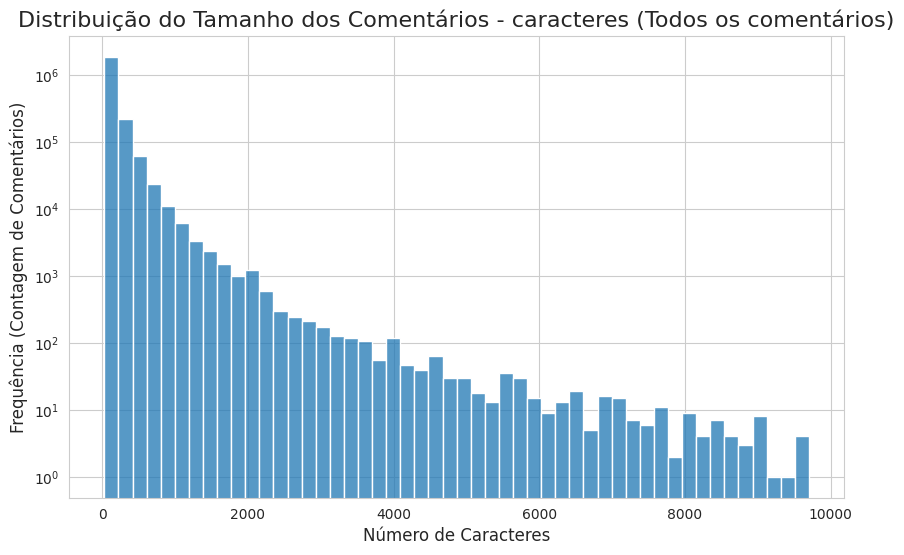

In [27]:
# --- Código para criar o histograma ---

# Define o estilo do gráfico
sns.set_style("whitegrid")

# Cria a figura e os eixos para o gráfico
plt.figure(figsize=(10, 6))

# Cria o histograma da coluna 'tamanho_texto'
# O argumento kde=True adiciona a linha de estimativa de densidade
ax = sns.histplot(data=df_comentarios_limpos, x='tamanho_texto', bins=50)
ax.set_yscale('log')

# Adiciona títulos e rótulos para clareza
plt.title('Distribuição do Tamanho dos Comentários - caracteres (Todos os comentários)', fontsize=16)
plt.xlabel('Número de Caracteres', fontsize=12)
plt.ylabel('Frequência (Contagem de Comentários)', fontsize=12)

# Mostra o gráfico
plt.show()

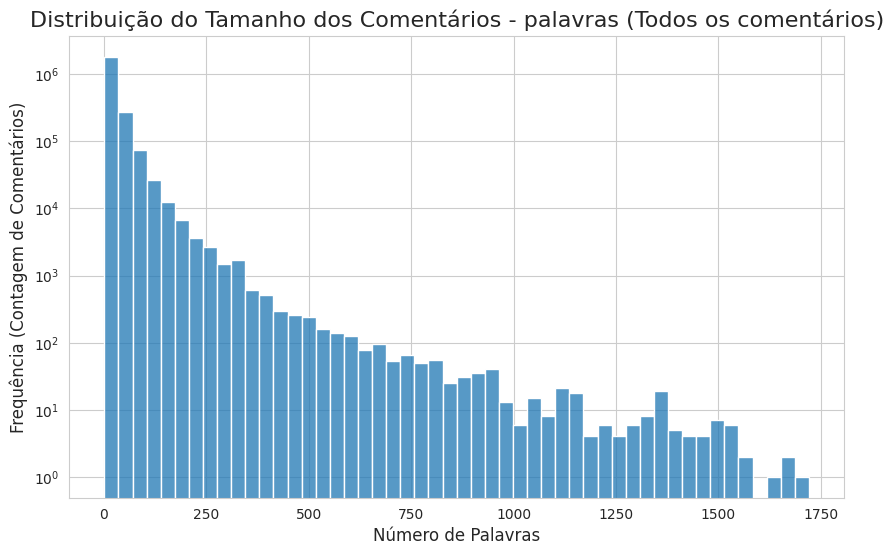

In [28]:
# --- Código para criar o histograma ---

# Define o estilo do gráfico
sns.set_style("whitegrid")

# Cria a figura e os eixos para o gráfico
plt.figure(figsize=(10, 6))

# Cria o histograma da coluna 'tamanho_texto'
# O argumento kde=True adiciona a linha de estimativa de densidade
ax = sns.histplot(data=df_comentarios_limpos, x='tamanho_texto_palavras', bins=50)
ax.set_yscale('log')

# Adiciona títulos e rótulos para clareza
plt.title('Distribuição do Tamanho dos Comentários - palavras (Todos os comentários)', fontsize=16)
plt.xlabel('Número de Palavras', fontsize=12)
plt.ylabel('Frequência (Contagem de Comentários)', fontsize=12)

# Mostra o gráfico
plt.show()

## Testes

In [ ]:
def get_subscriber_count(channel_number):
  """
  Retorna a quantidade de inscritos de um canal dado o seu número.

  Args:
    channel_number: O número inteiro do canal (ex: 10 para 'canal_10').

  Returns:
    A quantidade de inscritos do canal, ou None se o canal não for encontrado.
  """
  channel_id_anonimizado = f'canal_{channel_number}'
  channel_data = tabelona_final[tabelona_final['id_canal_anonimizado'] == channel_id_anonimizado]

  if not channel_data.empty:
    return channel_data['Inscritos'].iloc[0]
  else:
    return None

# Exemplo de uso:
channel_num = 10 # Substitua pelo número do canal que você quer verificar
inscritos_do_canal = get_subscriber_count(channel_num)

if inscritos_do_canal is not None:
  print(f"O canal {channel_num} tem {inscritos_do_canal:,} inscritos.")
else:
  print(f"Canal {channel_num} não encontrado.")

O canal 10 tem 320,000 inscritos.


KeyError: 'channel_id'

In [ ]:
def get_subscriber_count(channel_number):

  channel_id_anonimizado = f'canal_{channel_number}'
  channel_data = tabelona_final[tabelona_final['id_canal_anonimizado'] == channel_id_anonimizado]

  if not channel_data.empty:
    return channel_data['Inscritos'].iloc[0]
  else:
    return None

channel_num_input = 13
inscritos_do_canal = get_subscriber_count(channel_num_input)

if inscritos_do_canal is not None:
  print(f"O canal {channel_num_input} tem {inscritos_do_canal:,} inscritos.")
else:
  print(f"Canal {channel_num_input} não encontrado.")

O canal 13 tem 59,000 inscritos.


In [ ]:
print(df_canais_anonimizados.columns)

Index(['Unnamed: 0', 'description', 'published_at', 'country', 'view_count',
       'comment_count', 'subscriber_count', 'video_count', 'is_verified',
       'keywords', 'profile_picture_url', 'id_canal_anonimizado'],
      dtype='object')


In [ ]:
%pip install isodate